In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def predict(X, w, b): 
    return w * X + b

def train(X, y, w_init, b_init, lr=0.001, epochs=1000):
    w, b = w_init, b_init
    N = len(X)

    history = []

    for _ in range(epochs):
        y_pred = predict(X, w, b)

        error = y_pred - y

        mse = np.mean(np.square(error))

        history.append((w, b, mse))

        # Gradients
        dw = (2 / N) * np.sum(error * X)
        db = (2 / N) * np.sum(error)

        # Update params
        w -= lr * dw
        b -= lr * db

    return history

In [11]:
def make_animation(X, y, history, interval=5, save_as=None):
    fig, ax = plt.subplots(figsize=(6, 4))

    # Scatter plot of the data
    ax.scatter(X, y, color='blue', alpha=0.5, label='Data')

    # A line object we’ll update in each frame
    line, = ax.plot([], [], color='red', label='Fitted Line')

    ax.set_title('Gradient Descent Steps')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()

    # Pre-calculate axis limits for a stable view
    x_min, x_max = X.min(), X.max()
    ax.set_xlim(x_min - 1, x_max + 1)
    y_min, y_max = y.min(), y.max()
    ax.set_ylim(y_min - 5, y_max + 5)

    def update(frame_idx):
        """
        This function is called by FuncAnimation for each frame.
        frame_idx goes from 0 up to len(history) - 1.
        """
        w, b, mse = history[frame_idx]
        ax.set_title(f"Step {frame_idx+1}/{len(history)}, MSE={mse:.2f}")

        # Generate line values
        x_vals = np.linspace(x_min, x_max, 100)
        y_vals = w * x_vals + b

        # Update line data
        line.set_xdata(x_vals)
        line.set_ydata(y_vals)

        return line,

    # Create the animation
    anim = FuncAnimation(
        fig,
        update,
        frames=len(history),
        interval=interval,  # ms delay
        blit=False
    )

    # Optionally save animation as a GIF
    if save_as is not None:
        anim.save(save_as, writer='ffmpeg', fps=2)

    return anim

In [19]:
np.random.seed(42)
N = 1000
X = np.random.rand(N, 1) * 10
true_w = 2.0
true_b = 5.0 
noise = np.random.randn(N, 1) * 2
y = true_w * X + true_b + noise
w_init = np.random.randn()
b_init = np.random.randn()
lr = 0.001
epochs = 100

In [20]:
history = train(X, y, w_init, b_init, lr=lr, epochs=epochs)
final_w, final_b, final_mse = history[-1]
print(f"Final after {len(history)} steps:")
print(f"  w = {final_w:.3f}, b = {final_b:.3f}, MSE = {final_mse:.3f}")

Final after 100 steps:
  w = 2.658, b = 0.777, MSE = 9.375


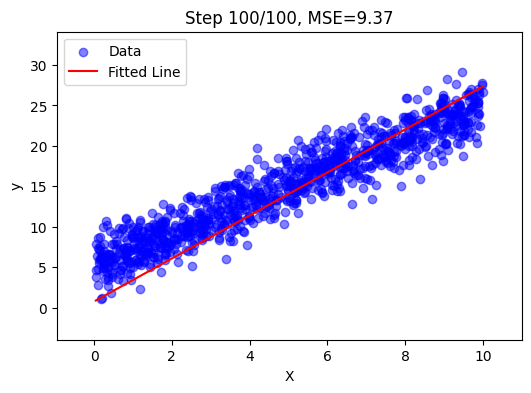

In [21]:
anim = make_animation(
    X, 
    y, 
    history,
    interval=5,
    save_as="gradient.gif" 
)

# Show the animation window
plt.show()